# **Подключение к хранилищу и загрузка библиотек**

In [76]:
import pandas as pd
from google.colab import files
import librosa
import matplotlib.pyplot as plt
import numpy as np
import os

In [77]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [78]:
%cd /content/drive/My Drive/Colab Notebooks/Files/

/content/drive/My Drive/Colab Notebooks/Files


# **Аудио**

In [80]:
df = pd.read_excel('sounds.xlsx')

In [81]:
df['Уровень 2'] = df['Уровень 2'].apply(lambda x: f'sounds/{x}')
df.head()

,Модальность,Уровень 1,Уровень 2
0,Аудио,Кошка,sounds/cat_1
1,NaN,Кошка,sounds/cat_2
2,NaN,Кошка,sounds/cat_3
3,NaN,Кошка,sounds/cat_4
4,NaN,Кошка,sounds/cat_5


In [82]:
df['Уровень 1'] = df['Уровень 1'].replace(to_replace='Кошка', value='Кот', regex=True)
df.head()

,Модальность,Уровень 1,Уровень 2
0,Аудио,Кот,sounds/cat_1
1,NaN,Кот,sounds/cat_2
2,NaN,Кот,sounds/cat_3
3,NaN,Кот,sounds/cat_4
4,NaN,Кот,sounds/cat_5


In [83]:
df['Спектрограмма'] = df['Уровень 2'].apply(lambda x: f'{x}_spectrogram')
df.head()

,Модальность,Уровень 1,Уровень 2,Спектрограмма
0,Аудио,Кот,sounds/cat_1,sounds/cat_1_spectrogram
1,NaN,Кот,sounds/cat_2,sounds/cat_2_spectrogram
2,NaN,Кот,sounds/cat_3,sounds/cat_3_spectrogram
3,NaN,Кот,sounds/cat_4,sounds/cat_4_spectrogram
4,NaN,Кот,sounds/cat_5,sounds/cat_5_spectrogram


In [84]:
df['Уровень 2'] = df['Уровень 2'].apply(lambda x: f'{x}.wav')
df['Спектрограмма'] = df['Спектрограмма'].apply(lambda x: f'{x}.jpg')
df.head()

,Модальность,Уровень 1,Уровень 2,Спектрограмма
0,Аудио,Кот,sounds/cat_1.wav,sounds/cat_1_spectrogram.jpg
1,NaN,Кот,sounds/cat_2.wav,sounds/cat_2_spectrogram.jpg
2,NaN,Кот,sounds/cat_3.wav,sounds/cat_3_spectrogram.jpg
3,NaN,Кот,sounds/cat_4.wav,sounds/cat_4_spectrogram.jpg
4,NaN,Кот,sounds/cat_5.wav,sounds/cat_5_spectrogram.jpg


In [85]:
df['Уровень 1'] = df['Уровень 1'].apply(preprocess_text)
df['Уровень 1'].unique()

array(['кот', 'курица', 'корова', 'собака', 'осел', 'лягушка', 'лев',
       'обезьяна', 'овца'], dtype=object)

In [24]:
def create_and_save_spectrogram(audio_path, output_path):
    y, sr = librosa.load(audio_path, sr=None)  # Загружаем аудио
    S = librosa.feature.melspectrogram(y=y, sr=sr)  # Создаем мел-спектрограмму
    S_dB = librosa.power_to_db(S, ref=np.max)  # Конвертируем в децибелы

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.savefig(output_path)
    plt.close()

In [ ]:
for index, row in df.iterrows():
    audio_path = row['Уровень 2']
    spectrogram_path = row['Спектрограмма']
    create_and_save_spectrogram(audio_path, spectrogram_path)

In [86]:
df.to_csv('sounds.csv', index=False)

# **Текстовые произведения**

In [162]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [163]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [164]:
df = pd.read_excel('composition.xlsx')

In [165]:
def preprocess_text(text):
    if isinstance(text, str):
        # Приведение текста к нижнему регистру
        text = text.lower()
        # Удаление пунктуации
        text = re.sub(r'[^\w\s]', '', text)
        # Токенизация
        words = word_tokenize(text)
        # Удаление стоп-слов
        stop_words = set(stopwords.words('russian'))  # Замените 'russian' на нужный язык
        words = [word for word in words if word not in stop_words]
        return ' '.join(words)
    else:
        return ''

In [166]:
df['Уровень 1'] = df['Уровень 1'].apply(preprocess_text)
df['Уровень 2'] = df['Уровень 2'].apply(preprocess_text)
df['Уровень 3'] = df['Уровень 3'].apply(preprocess_text)
df['Уровень 4'] = df['Уровень 4'].apply(preprocess_text)

In [167]:
df.head()

,Модальность,Уровень 1,Уровень 2,Уровень 3,Уровень 4
0,Текст,кот,жилбыл мужик мужика кот баловник беда надоел с...,лес дом поляна,лиса медведь волк заяц
1,NaN,кот,одни неприятности чердаке жил рыжий котёнок ни...,дом улица двор парк,собака мышь
2,NaN,кот,дворе высокий дом бимбом тилибом дворе высокий...,дом кухня двор сеновал,котята мышь петух собака
3,NaN,курица,крыльце хвалился гусь никого боюсь захочу индю...,крыльцо ферма поле сараи,гусь индюк коза свинья цыпленок
4,NaN,курица,жилибыли петух кура вышла кура избы град пошел...,изба поле яма,петух заяц лиса медведь птичка


In [168]:
data = df['Уровень 2'] + ' ' + df['Уровень 3'] + ' ' + df['Уровень 4']

In [169]:
sentences = [text.split() for text in data]

In [170]:
word2vec_model = Word2Vec(sentences, vector_size=1000, window=5, min_count=1, workers=4, epochs = 100)

In [171]:
def get_vector(text):
    words = text.split()
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if len(word_vectors) == 0:
        return np.zeros(100)
    return np.mean(word_vectors, axis=0)

In [172]:
df['Вектор'] = data.apply(get_vector)

In [173]:
df.head()

,Модальность,Уровень 1,Уровень 2,Уровень 3,Уровень 4,Вектор
0,Текст,кот,жилбыл мужик мужика кот баловник беда надоел с...,лес дом поляна,лиса медведь волк заяц,"[0.18622352, 0.032393914, 0.019522477, 0.03822..."
1,NaN,кот,одни неприятности чердаке жил рыжий котёнок ни...,дом улица двор парк,собака мышь,"[0.3562265, -0.006069777, 0.2746583, 0.2108649..."
2,NaN,кот,дворе высокий дом бимбом тилибом дворе высокий...,дом кухня двор сеновал,котята мышь петух собака,"[0.1273792, 0.20720188, 0.1536135, 0.06650485,..."
3,NaN,курица,крыльце хвалился гусь никого боюсь захочу индю...,крыльцо ферма поле сараи,гусь индюк коза свинья цыпленок,"[0.10149469, 0.11780487, 0.08551227, 0.0367897..."
4,NaN,курица,жилибыли петух кура вышла кура избы град пошел...,изба поле яма,петух заяц лиса медведь птичка,"[0.2241077, -0.104475126, 0.037089065, 0.08566..."


In [174]:
word_vectors = word2vec_model.wv
word_vectors.most_similar('лягушка', topn=5)

[('покушать', 0.9551834464073181),
 ('кря', 0.9394494295120239),
 ('обернулась', 0.9270257353782654),
 ('способна', 0.918040931224823),
 ('храбрая', 0.9142974019050598)]

In [175]:
df['Уровень 1'].unique()

array(['кот', 'курица', 'корова', 'собака', 'осел', 'лягушка', 'лев',
       'обезьяна', 'овца'], dtype=object)

In [176]:
import os

# Создание папки compositions, если она не существует
folder_path = 'compositions'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

In [177]:
# Проход по каждой строке DataFrame
for index, row in df.iterrows():
    # Определение имени файла для текста
    base_filename_text = f"{row['Уровень 1']}_composition"
    filename_text = os.path.join(folder_path, f"{base_filename_text}_1.txt")

    # Проверка наличия существующих файлов и создание уникального имени
    n = 1
    while os.path.exists(filename_text):
        n += 1
        filename_text = os.path.join(folder_path, f"{base_filename_text}_{n}.txt")

    # Сохранение текста в файл
    with open(filename_text, 'w', encoding='utf-8') as f:
        f.write(row['Уровень 2'])

    # Замена значения в столбце "Уровень 2" на новое значение (имя файла текста)
    df.at[index, 'Уровень 2'] = filename_text

    # Определение имени файла для вектора
    base_filename_vector = f"{row['Уровень 1']}_{index}_vector"
    filename_vector = os.path.join(folder_path, f"{base_filename_vector}_1.txt")

    # Проверка наличия существующих файлов и создание уникального имени
    n = 1
    while os.path.exists(filename_vector):
        n += 1
        filename_vector = os.path.join(folder_path, f"{base_filename_vector}_{n}.txt")

    # Сохранение вектора в файл
    with open(filename_vector, 'w', encoding='utf-8') as f:
        vector_str = ' '.join(map(str, row['Вектор']))
        f.write(vector_str)

    # Замена значения в столбце "Вектор" на новое значение (имя файла вектора)
    df.at[index, 'Вектор'] = filename_vector

In [178]:
df

,Модальность,Уровень 1,Уровень 2,Уровень 3,Уровень 4,Вектор
0,Текст,кот,compositions/кот_composition_1.txt,лес дом поляна,лиса медведь волк заяц,compositions/кот_0_vector_1.txt
1,NaN,кот,compositions/кот_composition_2.txt,дом улица двор парк,собака мышь,compositions/кот_1_vector_1.txt
2,NaN,кот,compositions/кот_composition_3.txt,дом кухня двор сеновал,котята мышь петух собака,compositions/кот_2_vector_1.txt
3,NaN,курица,compositions/курица_composition_1.txt,крыльцо ферма поле сараи,гусь индюк коза свинья цыпленок,compositions/курица_3_vector_1.txt
4,NaN,курица,compositions/курица_composition_2.txt,изба поле яма,петух заяц лиса медведь птичка,compositions/курица_4_vector_1.txt
5,NaN,курица,compositions/курица_composition_3.txt,огород яблонька,бабушка внучка мышка зайка,compositions/курица_5_vector_1.txt
6,NaN,корова,compositions/корова_composition_1.txt,сарай дом поле,телёнок,compositions/корова_6_vector_1.txt
7,NaN,корова,compositions/корова_composition_2.txt,царство государство чистое поле темные леса вы...,коровушкабурёнушка гуси,compositions/корова_7_vector_1.txt
8,NaN,корова,compositions/корова_composition_3.txt,поле двор дома лоханка городбазар улица возле ...,,compositions/корова_8_vector_1.txt
9,NaN,собака,compositions/собака_composition_1.txt,дом улица комната бабушки ольги,,compositions/собака_9_vector_1.txt


In [179]:
df.to_csv('compositions.csv', index=False)

# **Текстовые описания**

In [180]:
df = pd.read_excel('description.xlsx')

In [181]:
df['Уровень 1'] = df['Уровень 1'].apply(preprocess_text)
df['Уровень 2'] = df['Уровень 2'].apply(preprocess_text)
df['Уровень 3'] = df['Уровень 3'].apply(preprocess_text)

In [182]:
df.head()

,Модальность,Уровень 1,Уровень 2,Уровень 3
0,Текст,кот,грациозное элегантное животное короткой шерсть...,сиамская грациозное элегантное короткая шерсть...
1,NaN,кот,красивая порода длинной шелковистой шерстью не...,персидская длинная шерсть нежный выразительные...
2,NaN,кот,компактная мускулистая порода кроткой мордочко...,британская короткошерстная компактная мускулис...
3,NaN,кот,крупная мощная кошка длинной густой шерстью не...,мейнкун крупная мощная длинная густая шерсть п...
4,NaN,кот,порода шерсти мускулистым телом большими ушами...,сфинкс шерсти мускулистый уши нетрадиционный л...


In [183]:
data = df['Уровень 2'] + ' ' + df['Уровень 3']

In [184]:
sentences = [text.split() for text in data]

In [185]:
word2vec_model = Word2Vec(sentences, vector_size=1000, window=5, min_count=1, workers=4, epochs = 100)

In [186]:
df['Вектор'] = data.apply(get_vector)

In [187]:
df

,Модальность,Уровень 1,Уровень 2,Уровень 3,Вектор
0,Текст,кот,грациозное элегантное животное короткой шерсть...,сиамская грациозное элегантное короткая шерсть...,"[0.1290162, 0.050477687, 0.13405918, 0.0304769..."
1,NaN,кот,красивая порода длинной шелковистой шерстью не...,персидская длинная шерсть нежный выразительные...,"[0.1434388, 0.05333993, 0.10563527, 0.01001521..."
2,NaN,кот,компактная мускулистая порода кроткой мордочко...,британская короткошерстная компактная мускулис...,"[0.081050225, 0.042876326, 0.03986213, 0.01759..."
3,NaN,кот,крупная мощная кошка длинной густой шерстью не...,мейнкун крупная мощная длинная густая шерсть п...,"[0.1504925, 0.034983646, 0.11285062, 0.0103236..."
4,NaN,кот,порода шерсти мускулистым телом большими ушами...,сфинкс шерсти мускулистый уши нетрадиционный л...,"[0.090122424, 0.06749807, 0.15395276, -0.02976..."
...,...,...,...,...,...
265,NaN,овца,чёрные волынские овцы имеют черную шерсть черн...,черная черные отметины,"[0.1645563, -0.031448968, 0.048805457, 0.18075..."
266,NaN,овца,порода короткой густой шерстью средним телосло...,короткая густая белая черные отметины,"[0.25697425, -0.012241352, 0.125081, 0.1570254..."
267,NaN,овца,черноголовые альпийские овцы имеют черную шерс...,черная белая черные отметины,"[0.17024992, -0.031715766, 0.045663927, 0.1967..."
268,NaN,овца,крупные овцы короткой густой шерстью мощным те...,крупные короткая густая белая черные отметины,"[0.25965434, -0.01709657, 0.09927355, 0.172989..."


In [188]:
df['Уровень 1'].unique()

array(['кот', 'курица', 'корова', 'собака', 'осел', 'лягушка', 'лев',
       'обезьяна', 'овца'], dtype=object)

In [189]:
folder_path = 'descriptions'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

In [190]:
for index, row in df.iterrows():
    # Определение имени файла для текста
    base_filename_text = f"{row['Уровень 1']}_description"
    filename_text = os.path.join(folder_path, f"{base_filename_text}_1.txt")

    # Проверка наличия существующих файлов и создание уникального имени
    n = 1
    while os.path.exists(filename_text):
        n += 1
        filename_text = os.path.join(folder_path, f"{base_filename_text}_{n}.txt")

    # Сохранение текста в файл
    with open(filename_text, 'w', encoding='utf-8') as f:
        f.write(row['Уровень 2'])

    # Замена значения в столбце "Уровень 2" на новое значение (имя файла текста)
    df.at[index, 'Уровень 2'] = filename_text

    # Определение имени файла для вектора
    filename_vector = os.path.join(folder_path, f"{base_filename_text}_vector_{n}.txt")

    # Сохранение вектора в файл
    with open(filename_vector, 'w', encoding='utf-8') as f:
        vector_str = ' '.join(map(str, row['Вектор']))
        f.write(vector_str)

    # Замена значения в столбце "Вектор" на новое значение (имя файла вектора)
    df.at[index, 'Вектор'] = filename_vector

In [191]:
df

,Модальность,Уровень 1,Уровень 2,Уровень 3,Вектор
0,Текст,кот,descriptions/кот_description_1.txt,сиамская грациозное элегантное короткая шерсть...,descriptions/кот_description_vector_1.txt
1,NaN,кот,descriptions/кот_description_2.txt,персидская длинная шерсть нежный выразительные...,descriptions/кот_description_vector_2.txt
2,NaN,кот,descriptions/кот_description_3.txt,британская короткошерстная компактная мускулис...,descriptions/кот_description_vector_3.txt
3,NaN,кот,descriptions/кот_description_4.txt,мейнкун крупная мощная длинная густая шерсть п...,descriptions/кот_description_vector_4.txt
4,NaN,кот,descriptions/кот_description_5.txt,сфинкс шерсти мускулистый уши нетрадиционный л...,descriptions/кот_description_vector_5.txt
...,...,...,...,...,...
265,NaN,овца,descriptions/овца_description_26.txt,черная черные отметины,descriptions/овца_description_vector_26.txt
266,NaN,овца,descriptions/овца_description_27.txt,короткая густая белая черные отметины,descriptions/овца_description_vector_27.txt
267,NaN,овца,descriptions/овца_description_28.txt,черная белая черные отметины,descriptions/овца_description_vector_28.txt
268,NaN,овца,descriptions/овца_description_29.txt,крупные короткая густая белая черные отметины,descriptions/овца_description_vector_29.txt


In [192]:
df.to_csv('descriptions.csv', index=False)

In [193]:
y_numeric, y_categories = pd.factorize(df['Уровень 1'])

In [54]:
X = df['Вектор']
y = y_numeric

In [55]:
X = np.array([vec for vec in X])

In [56]:
pd.DataFrame({'Уникальные значения': y_categories, 'Числовые значения': range(len(y_categories))})

,Уникальные значения,Числовые значения
0,кот,0
1,курица,1
2,корова,2
3,собака,3
4,осел,4
5,лягушка,5
6,лев,6
7,обезьяна,7
8,овца,8


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report

# Создание и обучение модели SGD Classifier
sgd_clf = SGDClassifier(loss='log',  # Логистическая регрессия (логистическая функция потерь)
                        penalty='elasticnet',  # L2-регуляризация
                        alpha=0.0001,  # Коэффициент регуляризации
                        learning_rate='optimal',  # Оптимальная скорость обучения
                        max_iter=1000,  # Максимальное количество итераций
                        tol=1e-3,  # Критерий останова
                        random_state=42)  # Фиксация случайного состояния для воспроизводимости
sgd_clf.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
y_pred = sgd_clf.predict(X_test)

# Оценка качества модели
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      0.83      0.91         6
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         8
           7       0.86      1.00      0.92         6
           8       0.86      1.00      0.92         6

    accuracy                           0.96        54
   macro avg       0.97      0.95      0.96        54
weighted avg       0.97      0.96      0.96        54



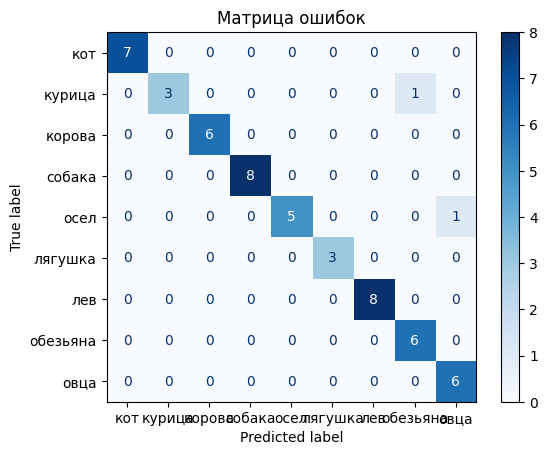

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_categories)
disp.plot(cmap='Blues', values_format='d')
plt.title('Матрица ошибок')
plt.show()

# **Изображения**

In [60]:
df = pd.read_excel('images.xlsx')

In [61]:
df.head()

,Модальность,Уровень 1,Уровень 2,Размеченный
0,Изображение,Кошка,cat_1,NaN
1,NaN,Кошка,cat_2,NaN
2,NaN,Кошка,cat_3,NaN
3,NaN,Кошка,cat_4,NaN
4,NaN,Кошка,cat_5,NaN


In [62]:
df['Уровень 2'] = df['Уровень 2'].apply(lambda x: f'images/{x}.jpg')
df.head()

,Модальность,Уровень 1,Уровень 2,Размеченный
0,Изображение,Кошка,images/cat_1.jpg,NaN
1,NaN,Кошка,images/cat_2.jpg,NaN
2,NaN,Кошка,images/cat_3.jpg,NaN
3,NaN,Кошка,images/cat_4.jpg,NaN
4,NaN,Кошка,images/cat_5.jpg,NaN


In [63]:
df['Уровень 1'] = df['Уровень 1'].replace(to_replace='Кошка', value='Кот', regex=True)
df.head()

,Модальность,Уровень 1,Уровень 2,Размеченный
0,Изображение,Кот,images/cat_1.jpg,NaN
1,NaN,Кот,images/cat_2.jpg,NaN
2,NaN,Кот,images/cat_3.jpg,NaN
3,NaN,Кот,images/cat_4.jpg,NaN
4,NaN,Кот,images/cat_5.jpg,NaN


In [64]:
df['Уровень 1'] = df['Уровень 1'].apply(preprocess_text)

In [65]:
df['Уровень 1'].unique()

array(['кот', 'курица', 'корова', 'собака', 'осел', 'лягушка', 'лев',
       'обезьяна', 'овца'], dtype=object)

In [66]:
df['Размеченный'] = df['Уровень 2'].apply(lambda x: f'{x}.json')
df.head()

,Модальность,Уровень 1,Уровень 2,Размеченный
0,Изображение,кот,images/cat_1.jpg,images/cat_1.jpg.json
1,NaN,кот,images/cat_2.jpg,images/cat_2.jpg.json
2,NaN,кот,images/cat_3.jpg,images/cat_3.jpg.json
3,NaN,кот,images/cat_4.jpg,images/cat_4.jpg.json
4,NaN,кот,images/cat_5.jpg,images/cat_5.jpg.json


In [67]:
df.to_csv('images.csv', index=False)